C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


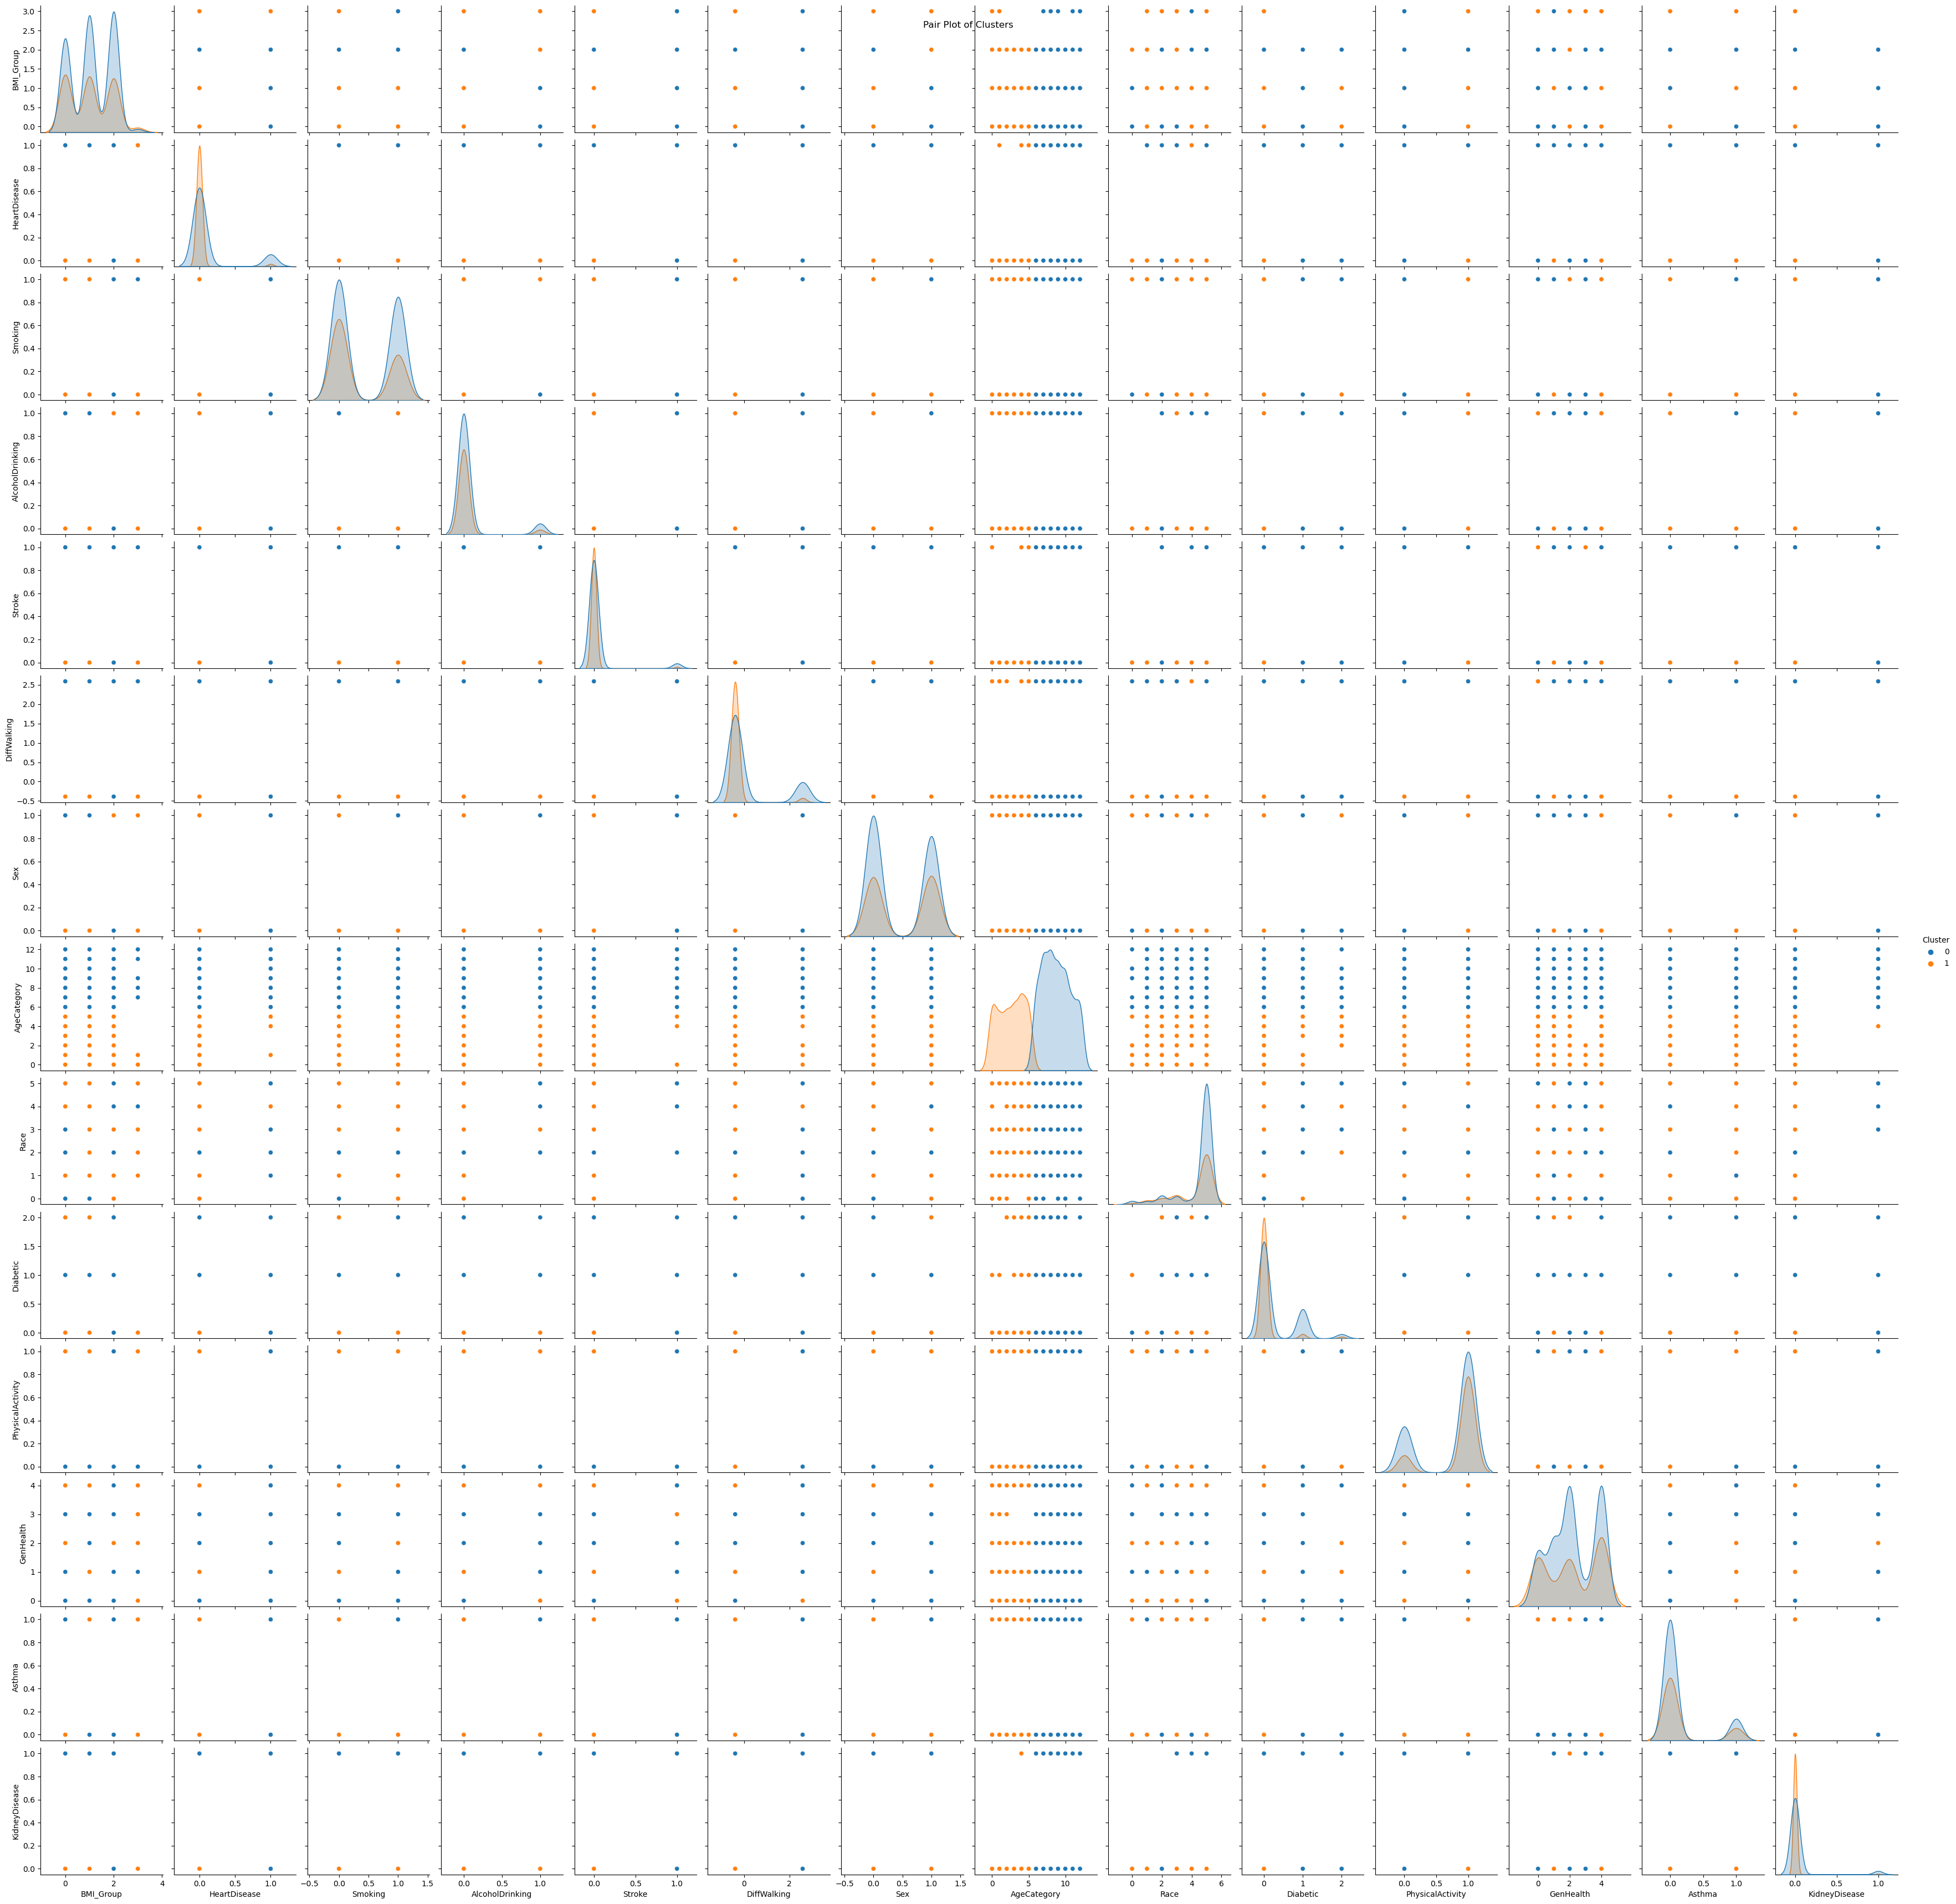

           Smoking  AlcoholDrinking   Diabetic  PhysicalActivity     Asthma  \
Cluster                                                                       
0        46.153846         8.173077  28.846154         72.435897  15.224359   
1        35.904255         5.053191   6.117021         84.840426  16.489362   

         KidneyDisease  
Cluster                 
0             4.326923  
1             0.531915  
Indicator: Smoking, Cluster: 0, p-value: 0.1280
Indicator: Smoking, Cluster: 1, p-value: 0.0313 (Statistically significant)
Indicator: AlcoholDrinking, Cluster: 0, p-value: 0.3815
Indicator: AlcoholDrinking, Cluster: 1, p-value: 0.1910
Indicator: Diabetic, Cluster: 0, p-value: 0.0006 (Statistically significant)
Indicator: Diabetic, Cluster: 1, p-value: 0.0000 (Statistically significant)
Indicator: PhysicalActivity, Cluster: 0, p-value: 0.0340 (Statistically significant)
Indicator: PhysicalActivity, Cluster: 1, p-value: 0.0016 (Statistically significant)
Indicator: Asthma, Clus

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.metrics import silhouette_score

# Load the cleaned dataset
data = pd.read_csv("heart_2020_cleaned.csv")

# List of columns with "Yes" and "No" values
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                  'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Convert "Yes" and "No" to 1 and 0 for each column
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Define bin edges and labels for BMI groups
bin_edges = [0, 18.5, 24.9, 29.9, float('inf')]
bin_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

# Create a new column for BMI groups
data['BMI_Group'] = pd.cut(data['BMI'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Select relevant columns for clustering
columns_for_clustering = ['BMI_Group', 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                          'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease']

# Subset the data and reduce to 1000 samples
subset_data = data[columns_for_clustering].sample(n=1000, random_state=42)

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
subset_data_encoded = subset_data.apply(lambda x: label_encoder.fit_transform(x))

# Define the numerical features for standardization
numerical_features = ['DiffWalking']

# Standardize numerical features
scaler = StandardScaler()
subset_data_encoded[numerical_features] = scaler.fit_transform(subset_data_encoded[numerical_features])

# Perform K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
subset_data_encoded['Cluster'] = kmeans.fit_predict(subset_data_encoded)

# Visualize cluster results using pairplot
sns.pairplot(data=subset_data_encoded, hue='Cluster', diag_kind='kde')
plt.suptitle('Pair Plot of Clusters')
plt.show()

# Calculate the percentage of patients with each health indicator in each cluster
health_indicators = ['Smoking', 'AlcoholDrinking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease']
cluster_health_percentages = subset_data_encoded.groupby('Cluster')[health_indicators].mean() * 100
print(cluster_health_percentages)

for indicator in health_indicators:
    for cluster in range(num_clusters):
        cluster_data = subset_data_encoded[subset_data_encoded['Cluster'] == cluster]
        category_values = cluster_data[indicator]
        
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(category_values, subset_data_encoded[indicator])
        
        if p_value < 0.05:
            print(f"Indicator: {indicator}, Cluster: {cluster}, p-value: {p_value:.4f} (Statistically significant)")
        else:
            print(f"Indicator: {indicator}, Cluster: {cluster}, p-value: {p_value:.4f}")
            

C:\Users\darie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\darie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\darie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\darie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\darie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\darie\anaconda3\lib\s

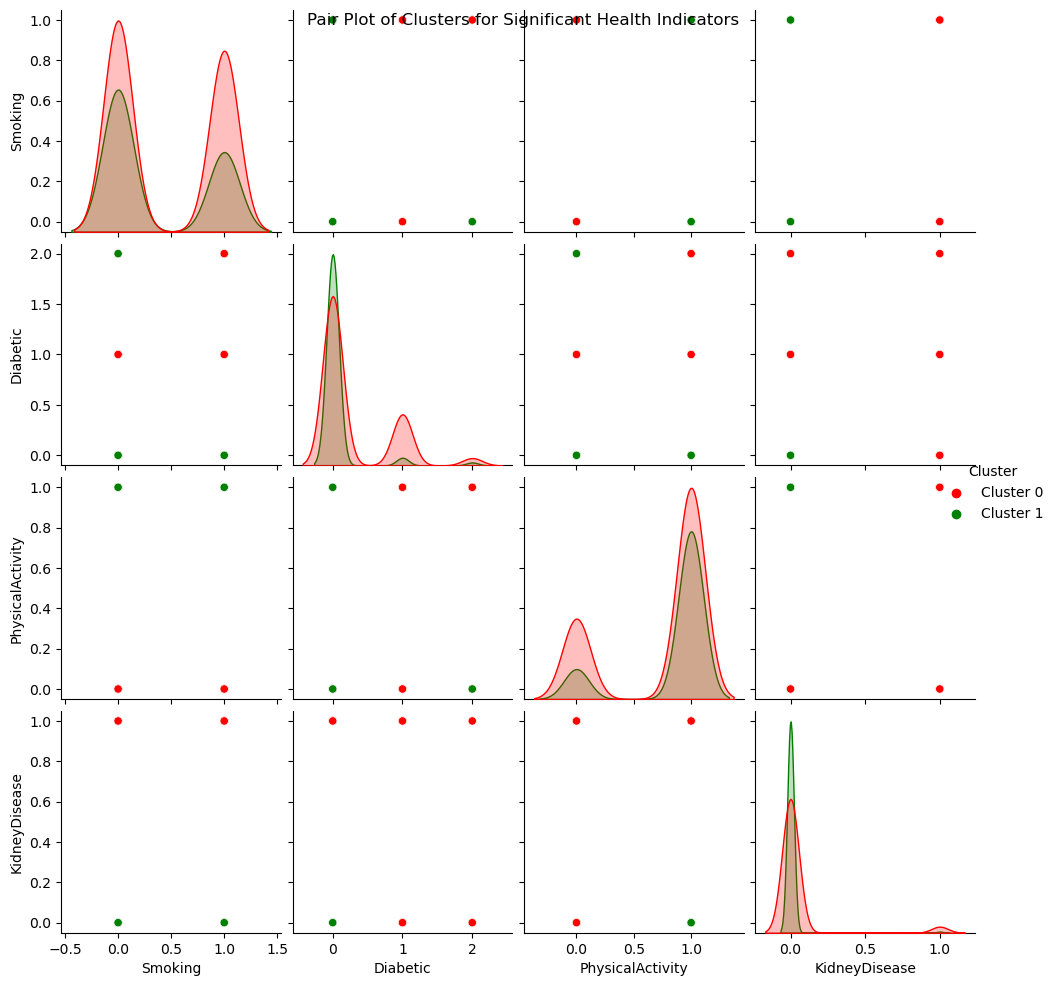

In [2]:
# List of significant health indicators
significant_health_indicators = ['Smoking', 'Diabetic', 'PhysicalActivity', 'KidneyDisease']

# Filter the data to include only significant health indicators
significant_data = subset_data_encoded[['Cluster'] + significant_health_indicators]


# Define a custom color palette for the clusters
custom_palette = ['red', 'green', 'blue', 'orange', 'purple']

# Create the pairplot with the custom palette
g = sns.pairplot(data=significant_data, hue='Cluster', diag_kind='kde', palette=custom_palette)

# Set the legend title and labels
g._legend.set_title('Cluster')
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
for t, l in zip(g._legend.texts, legend_labels):
    t.set_text(l)

# Set the title for the pairplot
plt.suptitle('Pair Plot of Clusters for Significant Health Indicators')

# Show the pairplot
plt.show()


In [3]:
# Define the column mapping for health indicators
health_indicator_mapping = {
    'Smoking': 'Smoking',
    'Diabetic': 'Diabetic',
    'PhysicalActivity': 'PhysicalActivity',
    'KidneyDisease': 'KidneyDisease'
}

# Iterate through each cluster
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")

    # Filter the data for the current cluster
    cluster_data = significant_data[significant_data['Cluster'] == cluster]

    # Calculate the percentage of patients in the cluster
    cluster_percentage = len(cluster_data) / len(significant_data) * 100
    print(f"Percentage of patients: {cluster_percentage:.2f}%")

    # Calculate the mean of each health indicator for the cluster
    cluster_mean = cluster_data[significant_health_indicators].mean()
    
    # Print the mean of each health indicator for the cluster
    for indicator, value in cluster_mean.items():
        indicator_name = health_indicator_mapping[indicator]
        print(f"Mean {indicator_name}: {value:.2f}")
    
    print("\n")

Cluster 0:
Percentage of patients: 62.40%
Mean Smoking: 0.46
Mean Diabetic: 0.29
Mean PhysicalActivity: 0.72
Mean KidneyDisease: 0.04


Cluster 1:
Percentage of patients: 37.60%
Mean Smoking: 0.36
Mean Diabetic: 0.06
Mean PhysicalActivity: 0.85
Mean KidneyDisease: 0.01




In [4]:
# Create a list to store individual cluster result DataFrames
result_dfs = []

# Populate the DataFrame with cluster percentages and ANOVA p-values
for cluster in range(num_clusters):
    cluster_data = subset_data_encoded[subset_data_encoded['Cluster'] == cluster]
    cluster_percentage = len(cluster_data) / len(subset_data_encoded) * 100
    
    row = {'Cluster': cluster, 'p-value': None}
    
    for indicator in significant_health_indicators:
        indicator_percentage = (cluster_data[indicator].sum() / len(cluster_data)) * 100
        row[indicator] = indicator_percentage
    
    # ANOVA test for each indicator
    p_values = []
    for indicator in significant_health_indicators:
        f_statistic, p_value = f_oneway(cluster_data[indicator], subset_data_encoded[indicator])
        p_values.append(f'{p_value:.6f}')  # Convert p-value to a formatted string

    row['p-value'] = ', '.join(p_values)  # Join the list of p-values into a single string
    
    # Create a DataFrame for the current cluster's results
    cluster_result_df = pd.DataFrame([row])
    result_dfs.append(cluster_result_df)

# Concatenate all cluster result DataFrames into the final results DataFrame
results_df = pd.concat(result_dfs, ignore_index=True)

# Display the results DataFrame
print(results_df)

   Cluster                                 p-value    Smoking   Diabetic  \
0        0  0.127996, 0.000551, 0.034007, 0.125450  46.153846  28.846154   
1        1  0.031308, 0.000000, 0.001598, 0.008319  35.904255   6.117021   

   PhysicalActivity  KidneyDisease  
0         72.435897       4.326923  
1         84.840426       0.531915  


In [5]:
from scipy.stats import ttest_ind
health_indicators_for_ttest = ['Smoking', 'Diabetic', 'PhysicalActivity', 'KidneyDisease']

# Perform t-tests between heart disease and non-heart disease patients
for indicator in health_indicators_for_ttest:
    heart_disease_patients = subset_data_encoded[subset_data_encoded['HeartDisease'] == 1][indicator]
    non_heart_disease_patients = subset_data_encoded[subset_data_encoded['HeartDisease'] == 0][indicator]
    
    t_statistic, p_value = ttest_ind(heart_disease_patients, non_heart_disease_patients)
    
    if p_value < 0.05:
        print(f"Indicator: {indicator}, p-value: {p_value:.4f} (Statistically significant)")
    else:
        print(f"Indicator: {indicator}, p-value: {p_value:.4f}")

Indicator: Smoking, p-value: 0.0355 (Statistically significant)
Indicator: Diabetic, p-value: 0.0003 (Statistically significant)
Indicator: PhysicalActivity, p-value: 0.0227 (Statistically significant)
Indicator: KidneyDisease, p-value: 0.0000 (Statistically significant)


In [6]:
# Perform t-tests between clusters for each significant health indicator
for indicator in significant_health_indicators:
    for cluster in range(num_clusters):
        cluster_data = subset_data_encoded[subset_data_encoded['Cluster'] == cluster]
        cluster_values = cluster_data[indicator]
        
        other_clusters_data = subset_data_encoded[subset_data_encoded['Cluster'] != cluster]
        other_clusters_values = other_clusters_data[indicator]
        
        t_statistic, p_value = ttest_ind(cluster_values, other_clusters_values)
        
        if p_value < 0.05:
            print(f"Indicator: {indicator}, Cluster: {cluster}, p-value: {p_value:.4f} (Statistically significant)")
        else:
            print(f"Indicator: {indicator}, Cluster: {cluster}, p-value: {p_value:.4f}")

Indicator: Smoking, Cluster: 0, p-value: 0.0015 (Statistically significant)
Indicator: Smoking, Cluster: 1, p-value: 0.0015 (Statistically significant)
Indicator: Diabetic, Cluster: 0, p-value: 0.0000 (Statistically significant)
Indicator: Diabetic, Cluster: 1, p-value: 0.0000 (Statistically significant)
Indicator: PhysicalActivity, Cluster: 0, p-value: 0.0000 (Statistically significant)
Indicator: PhysicalActivity, Cluster: 1, p-value: 0.0000 (Statistically significant)
Indicator: KidneyDisease, Cluster: 0, p-value: 0.0005 (Statistically significant)
Indicator: KidneyDisease, Cluster: 1, p-value: 0.0005 (Statistically significant)


In [7]:
# Calculate the distribution of heart disease patients in each cluster
heart_disease_distribution = subset_data_encoded.groupby('Cluster')['HeartDisease'].value_counts(normalize=True) * 100
print("Distribution of Heart Disease Patients in Each Cluster:")
print(heart_disease_distribution)

# Calculate the percentage of patients with significant health indicators in each cluster
cluster_health_percentages = significant_data.groupby('Cluster')[significant_health_indicators].mean() * 100
print("\nPercentage of Patients with Significant Health Indicators in Each Cluster:")
print(cluster_health_percentages)

Distribution of Heart Disease Patients in Each Cluster:
Cluster  HeartDisease
0        0               86.858974
         1               13.141026
1        0               98.138298
         1                1.861702
Name: proportion, dtype: float64

Percentage of Patients with Significant Health Indicators in Each Cluster:
           Smoking   Diabetic  PhysicalActivity  KidneyDisease
Cluster                                                       
0        46.153846  28.846154         72.435897       4.326923
1        35.904255   6.117021         84.840426       0.531915


C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

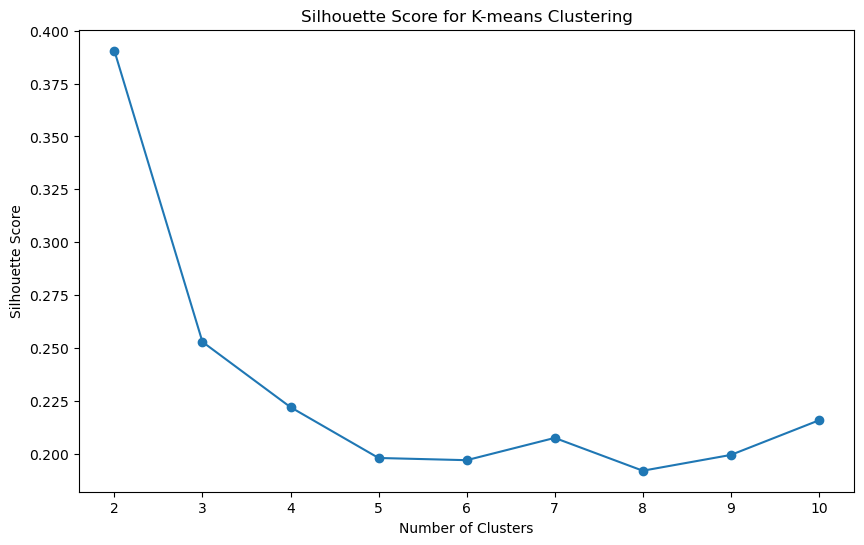

In [8]:
# Create a list to store the Silhouette Scores for different cluster numbers
silhouette_scores = []

# Try different cluster numbers from 2 to a maximum value
max_clusters = 10
for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(subset_data_encoded.drop('Cluster', axis=1))
    silhouette_scores.append(silhouette_score(subset_data_encoded.drop('Cluster', axis=1), cluster_labels))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [9]:
# Create a list to store the Silhouette Scores for different cluster numbers
silhouette_scores = []

# Try different cluster numbers from 2 to a maximum value
max_clusters = 10
for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(subset_data_encoded.drop('Cluster', axis=1))
    silhouette_scores.append(silhouette_score(subset_data_encoded.drop('Cluster', axis=1), cluster_labels))

# Print out the results
print("Silhouette Scores for Different Cluster Numbers:")
for num_clusters, score in zip(range(2, max_clusters + 1), silhouette_scores):
    print(f"Number of Clusters: {num_clusters}, Silhouette Score: {score:.4f}")


C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Silhouette Scores for Different Cluster Numbers:
Number of Clusters: 2, Silhouette Score: 0.3905
Number of Clusters: 3, Silhouette Score: 0.2529
Number of Clusters: 4, Silhouette Score: 0.2220
Number of Clusters: 5, Silhouette Score: 0.1980
Number of Clusters: 6, Silhouette Score: 0.1969
Number of Clusters: 7, Silhouette Score: 0.2075
Number of Clusters: 8, Silhouette Score: 0.1920
Number of Clusters: 9, Silhouette Score: 0.1994
Number of Clusters: 10, Silhouette Score: 0.2158


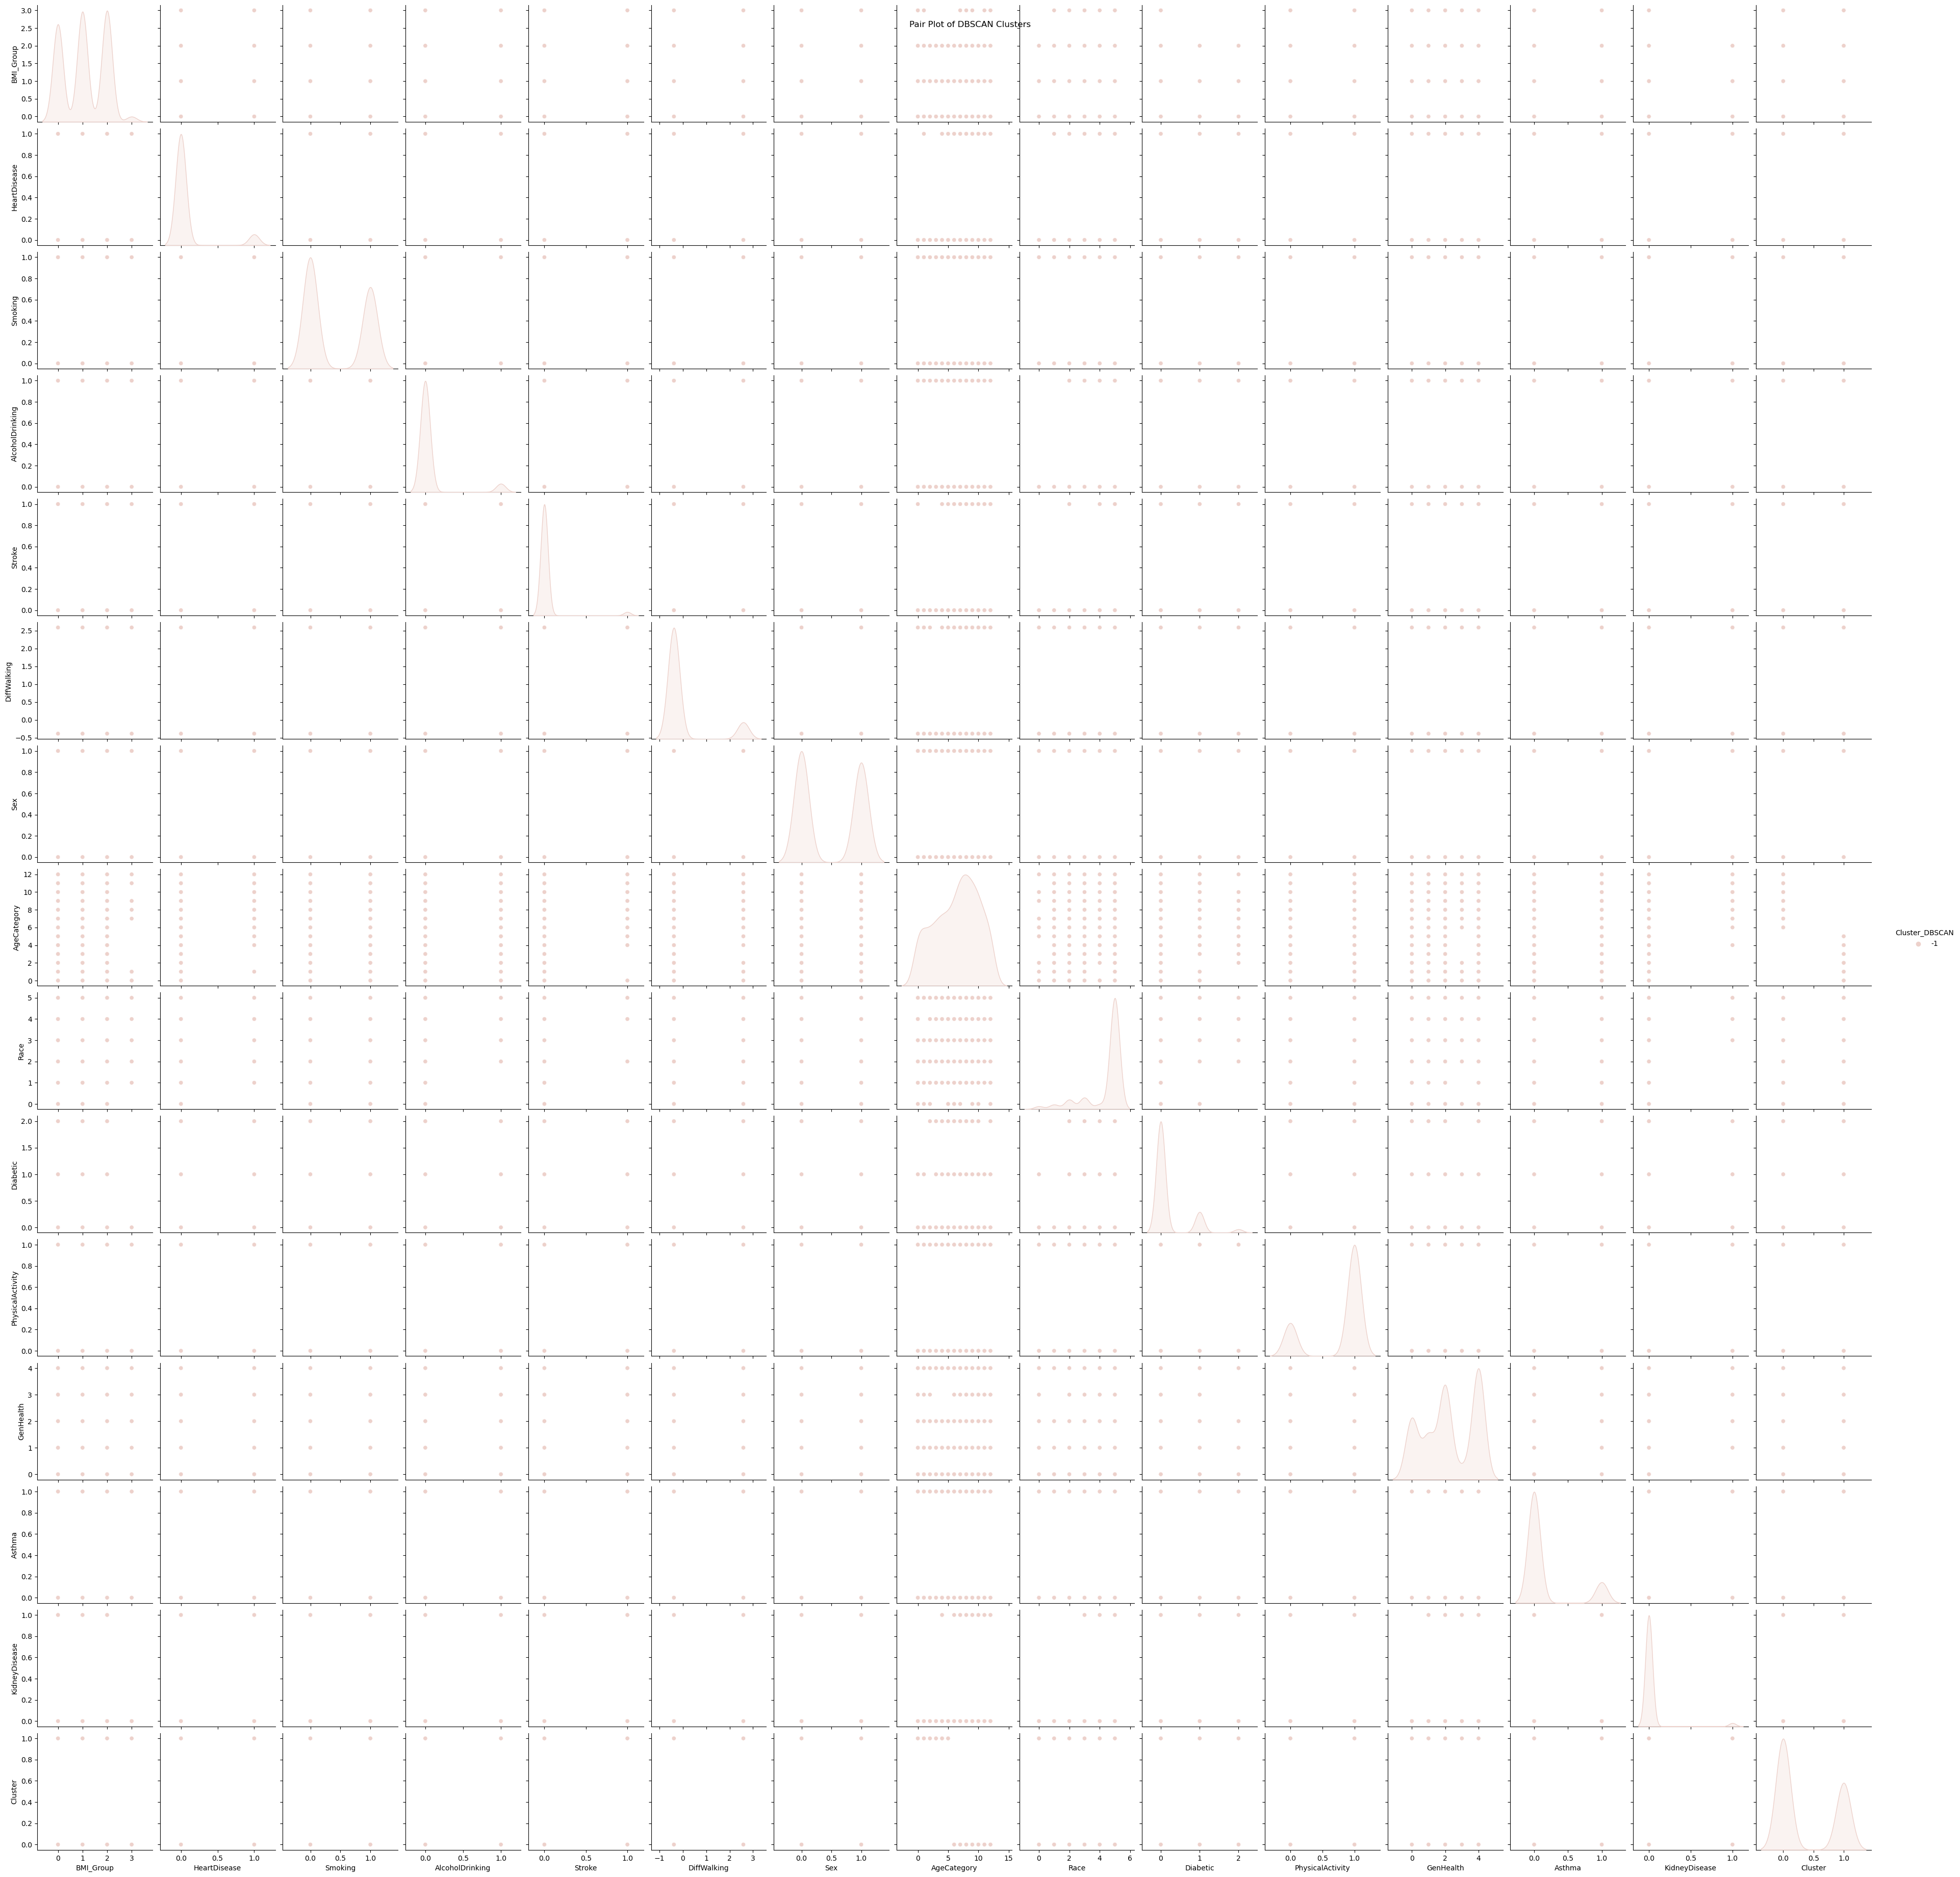

                Smoking  AlcoholDrinking  Diabetic  PhysicalActivity  Asthma  \
Cluster_DBSCAN                                                                 
-1                 42.3              7.0      20.3              77.1    15.7   

                KidneyDisease  
Cluster_DBSCAN                 
-1                        2.9  


In [10]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust these parameters
subset_data_encoded['Cluster_DBSCAN'] = dbscan.fit_predict(subset_data_encoded.drop('Cluster', axis=1))

# Visualize DBSCAN cluster results using pairplot
sns.pairplot(data=subset_data_encoded, hue='Cluster_DBSCAN', diag_kind='kde')
plt.suptitle('Pair Plot of DBSCAN Clusters')
plt.show()

# Calculate the percentage of patients with each health indicator in each DBSCAN cluster
dbscan_cluster_health_percentages = subset_data_encoded.groupby('Cluster_DBSCAN')[health_indicators].mean() * 100
print(dbscan_cluster_health_percentages)
